Olá povo hypeano! Os membros deste projeto que vos falam são Eduardo Almeida e Enrico Aranha.

E para esse projeto de Machine Learning, escolhemos o dataset Stellar Classification, esperamos que vocês gostem ;)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregamos o dataset
df = pd.read_csv('star_classification.csv')

# Damos uma olhada inicial nele
display(df.head(10))
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Aqui vemos as seguintes colunas:

obj_ID: O identificador único para cada objeto detectado

alpha (Ascensão Reta): Pense nela como a "longitude" do céu. É uma das coordenadas usadas para localizar um objeto no espaço.

delta (Declinação): Pense nela como a "latitude" do céu. É a outra coordenada necessária para a localização.

u: Brilho medido no filtro Ultravioleta.

g: Brilho medido no filtro Green (Verde).

r: Brilho medido no filtro Red (Vermelho).

i: Brilho medido no filtro Infravermelho próximo.

z: Brilho medido no filtro Z (infravermelho mais distante).

run_ID, rerun_ID, cam_col, field_ID: IDs que identificam a "corrida" de observação do telescópio, a versão do processamento dos dados, qual das 6 colunas da câmera foi usada e o campo de visão específico.

spec_obj_ID: Um identificador único e mais detalhado para os objetos que tiveram seu espectro medido.

class: tipo do objeto (estrela, galáxia, quasar)

redshift (Desvio para o Vermelho): Esta é uma das colunas mais importantes! Ela mede o quanto a luz de um objeto foi "esticada" enquanto viajava pelo universo em expansão. Para objetos distantes (como galáxias e quasares), o redshift está diretamente relacionado à sua distância e velocidade de afastamento.

plate: O ID da placa de metal onde os espectros de luz foram capturados.

MJD (Modified Julian Date): A data em que a observação do objeto (especificamente, a medição do seu espectro) foi feita.

fiber_ID: O ID da fibra ótica específica que foi apontada para o objeto para capturar sua luz.



Como as colunas que possuem ID no final não descrevem as características físicas dos objetos celestes, iremos removê-las para simplificar.

Mantivemos cam_col por conta dela ser uma variável categórica de baixa cardinalidade, só tendo 6 valores possíveis (1, 2, 3, 4, 5, 6), além dela ser uma característica do processo de medição, ao contrário dos IDs.

In [ ]:
df = df.drop(['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'fiber_ID'], axis=1)

Além disso, percebemos que o valor mínimo ('min') das colunas 'u', 'g' e 'z' é -9999.0, isso nos possivelmente indica um valor inválido, pois as medições de magnitude de brilho de uma estrela (as colunas u, g, r, i, z) não deveriam ter um valor negativo tão extremo e 'redondo'. Este número é um forte indicativo de que o sistema que coletou os dados usou -9999.0 como um código para representar um valor ausente, um erro de leitura ou um dado inválido. Daremos uma olhada rapidinha em quantas linhas são afetadas por esse valor.

In [ ]:
contagem_de_invalidos = df[(df['u'] == -9999.0) | (df['g'] == -9999.0) | (df['z'] == -9999.0)].shape[0]
print(f"Número de linhas com valor inválido em 'u', 'g' e 'z': {contagem_de_invalidos}")

Número de linhas com valor inválido em 'u', 'g' e 'z': 1


Como temos apenas 1 linha com esse erro, iremos removê-la só pra dar aquela garantida de qualidade maior para os dados.

In [ ]:
df = df.drop(df[df['u'] == -9999.0].index)

Vamos verificar também, se existe algum valor nulo ou faltante para também desconsiderarmos:

In [ ]:
df.isnull().sum()

,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
cam_col,0
class,0
redshift,0


Ótimo, nenhum valor nulo. Agora iremos realizar uma análise exploratória de dados

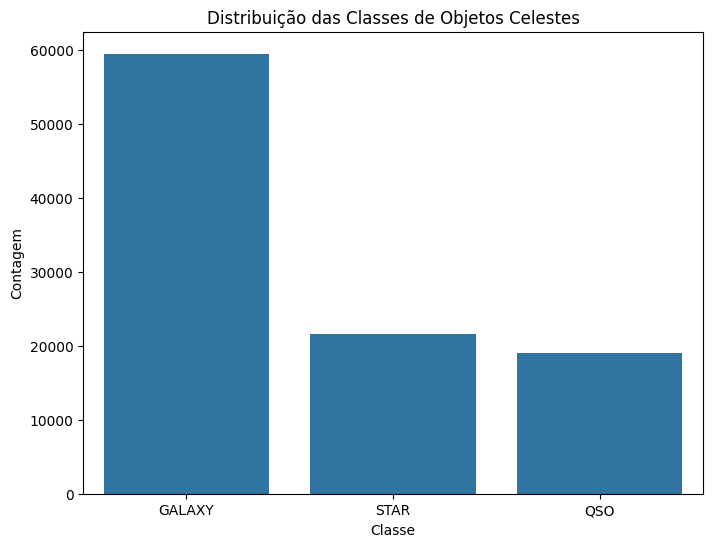

In [ ]:
# gráfico de barras para visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, order=df['class'].value_counts().index)
plt.title('Distribuição das Classes de Objetos Celestes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.savefig('class_distribution.png')

Este gráfico nos mostra visualmente o balanceamento das classes. Vemos claramente que há muito mais galáxias do que estrelas e quasares.

Nosso objetivo vai ser construir um modelo de Machine Learning capaz de prever a coluna 'class' (que classifica cada objeto com GALAXY, STAR ou QSO, como vimos no gráfico acima), ou seja, ela será nossa variável alvo.

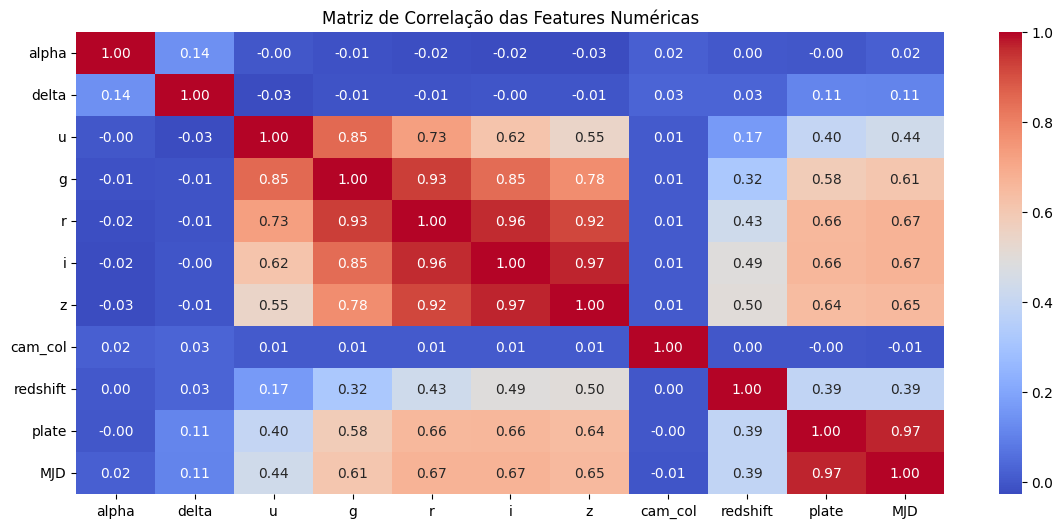

In [ ]:
# Visualizar a matriz de correlação das features numéricas
# Isso nos ajuda a entender como as variáveis se relacionam entre si.
# Uma correlação alta (perto de 1 ou -1) indica uma forte relação linear.
plt.figure(figsize=(14, 6))
# Selecionamos apenas as colunas numéricas para a matriz de correlação
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Features Numéricas')
plt.savefig('correlation_matrix.png')

O mapa de calor nos mostra que as bandas de filtro (u, g, r, i, z) são extremamente correlacionadas entre si.

Também que em astronomia, a cor de um objeto celeste é uma das suas características mais importantes, pois objetos diferentes emitem luz de forma diferente em vários comprimentos de onda. Assim, ao subtrair as magnitudes de dois filtros (por exemplo, u e g), criamos um índice de "cor". Estrelas azuis (muito quentes) terão valores diferentes de estrelas vermelhas (mais frias) ou de galáxias distantes.

In [ ]:
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

Essas novas colunas que criamos irão representar as cores, e vão dar ao nosso modelo de Machine Learning informações muito mais ricas e diretas para diferenciar as classes do que as colunas de magnitude isoladas.

Agora iremos realizar o pré-processamento dos dados para que o algoritmo de Machine Learning possa entender eles e usa-los da forma mais eficiente possível.

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

Dividimos o nosso dataframe em dois: X contém todas as colunas que usaremos para fazer a previsão, e y contém apenas a coluna que queremos prever, que é a class.

E como a maioria dos algoritmos de Machine Learning trabalha com números, não com texto, uma conversão se faz necessária para que o modelo possa processar a nossa variável-alvo.

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Transformamos os nomes das classes (GALAXY, QSO, STAR) em números (0, 1, 2).

Iremos agora dividir os nossos dados em dois conjuntos: um maior para treinar o modelo (80% dos dados) e um menor para testar (20% dos dados). Estamos seguindo a regra de ouro do Machine Learning de usar um conjunto de treino pra treinar o modelo, e em seguida, usar um de teste que ele não nunca viu antes para testar a eficácia dele.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\nTamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")


Tamanho do conjunto de treino: 79999 amostras
Tamanho do conjunto de teste: 20000 amostras


Agora iremos padronizar a escala de todas as nossas colunas numéricas, e após termos feito isso, todas as nossas colunas terão uma média de 0 e um desvio padrão de 1.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fizemos isso por conta que as nossas features têm escalas muito diferentes (por exemplo, redshift varia de 0 a 7, enquanto MJD está na casa das dezenas de milhar). Logo, sem o escalonamento o modelo poderia dar uma importância indevida às features com números maiores, simplesmente por causa da sua escala, e não pela sua capacidade de previsão. Assim podemos dizer que o escalonamento coloca todas as features em um pé de igualdade.

Após feito o escolonamento, podemos começar a etapa de treinamento, e em seguida, a de avaliação do modelo.
Escolhemos o algoritmo de RandomForestClassifier segundo um outro [notebook de Navdeep Jakhar](https://colab.research.google.com/drive/1bv0rNKU89wvljSVnMT42IDN97PzAd8H3#scrollTo=QaMkvro9A3yE&line=2&uniqifier=1) que demonstrou que o RandomForest performou melhor entre os 6 algoritmos de teste


In [ ]:
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_baseline.fit(X_train_scaled, y_train)
y_pred = rf_baseline.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo Baseline: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Acurácia do Modelo Baseline: 98.00%
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.94      0.95      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



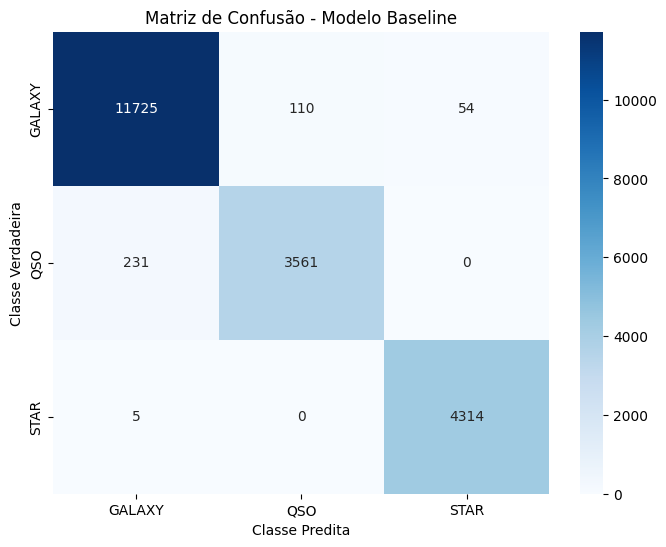

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Modelo Baseline')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.savefig('confusion_matrix_baseline.png')

Podemos ver que o nosso modelo baseline já apresenta uma performance excelente. O relatório de classificação mostra uma acurácia geral de 98%.
Além disso, olhando individualmente para cada classe:

GALAXY → ótimo desempenho (11725 acertos em 11889).

QSO → principal fonte de erro (231 confundidos com GALAXY).

STAR → praticamente perfeito (4314 de 4319).

Ou seja, nosso modelo funciona muito bem para GALAXY e STAR, porém piora um pouco para QSO.

Até aqui, usamos o modelo com valores padrão de configuração. Mas cada modelo de Machine Learning tem hiperparâmetros, que são ajustes feitos antes do treinamento e que podem influenciar bastante a performance.

Para encontrar a melhor combinação desses hiperparâmetros, vamos usar uma técnica chamada RandomizedSearchCV. Diferente do GridSearchCV, que testa todas as combinações possíveis, o RandomizedSearchCV escolhe algumas combinações de forma aleatória dentro do espaço de parâmetros que definimos. Isso deixa o processo mais rápido, principalmente quando temos muitas opções de valores.

No nosso caso, para a etapa de otimização, definimos diferentes valores possíveis para os hiperparâmetros chave: o número de árvores na floresta (n_estimators), a profundidade máxima (max_depth) e o número mínimo de amostras por folha (min_samples_leaf).

Em vez de testar todas as combinações possíveis, o que levaria muito tempo, optámos por usar o RandomizedSearchCV para fazer uma busca mais inteligente. Configurámos o algoritmo para testar 15 combinações aleatórias distintas. Cada combinação foi avaliada com validação cruzada (3-fold CV) para garantir que estávamos a medir a sua performance de forma justa.

Assim, conseguimos ter uma boa ideia de quais hiperparâmetros funcionam melhor para o nosso modelo sem gastar tanto tempo de processamento quanto seria necessário com o GridSearchCV ou com muitas iterações no RandomizedSearchCV.

OBS IMPORTANTE: Por conta das 15 combinações, a execução total do notebook levou cerca de 38min, quem estiver visualizando este notebook e for executar tudo não se assuste pelo tempo demorado kkkk.

In [ ]:


print("\n Otimização de Hiperparâmetros (Hyperparameter Tuning) ---")

# Definir a grade de parâmetros para testar
# Para a busca aleatória, podemos até dar mais opções
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
}

print("\nIniciando a busca pelos melhores hiperparâmetros com RandomizedSearchCV...")
# Vamos testar 15 combinações aleatórias, com 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                                   param_distributions=param_dist,
                                   n_iter=15,
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   scoring='accuracy')

random_search.fit(X_train_scaled, y_train)

print("Busca concluída.")
print("Melhores parâmetros encontrados:", random_search.best_params_)


 Otimização de Hiperparâmetros (Hyperparameter Tuning) ---

Iniciando a busca pelos melhores hiperparâmetros com RandomizedSearchCV...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END .max_depth=30, min_samples_leaf=1, n_estimators=250; total time= 1.3min
[CV] END .max_depth=30, min_samples_leaf=1, n_estimators=250; total time= 1.3min
[CV] END .max_depth=30, min_samples_leaf=1, n_estimators=250; total time= 1.3min
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=100; total time=  29.1s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=100; total time=  31.3s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=100; total time=  29.7s
[CV] END .max_depth=30, min_samples_leaf=1, n_estimators=200; total time=  59.0s
[CV] END .max_depth=30, min_samples_leaf=1, n_estimators=200; total time= 1.0min
[CV] END .max_depth=30, min_samples_leaf=1, n_estimators=200; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=250; total ti


 Avaliação do Modelo Otimizado ---

Acurácia do modelo otimizado: 0.9797

Relatório de Classificação (Otimizado):
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.94      0.95      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000


Matriz de Confusão (Otimizado):
Matriz de Confusão salva como 'confusion_matrix_tuned.png'


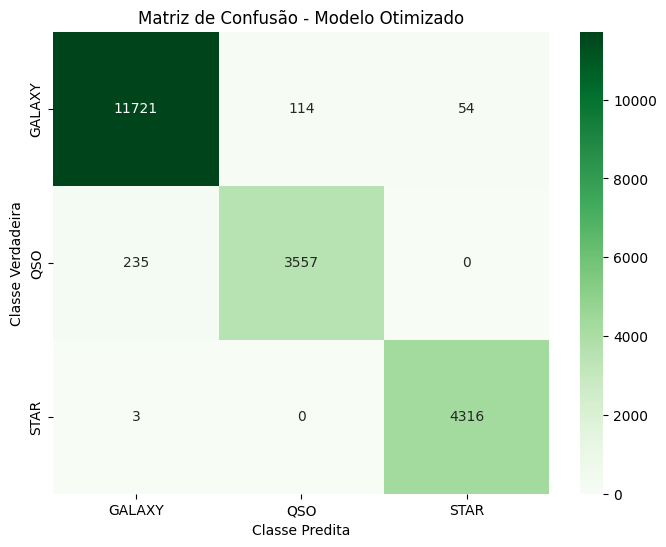

In [ ]:
print("\n Avaliação do Modelo Otimizado ---")
# Treinar o modelo com os melhores parâmetros encontrados
best_rf = random_search.best_estimator_

# Fazer predições com o modelo otimizado
y_pred_tuned = best_rf.predict(X_test_scaled)

# Avaliar a acurácia do modelo otimizado
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nAcurácia do modelo otimizado: {accuracy_tuned:.4f}")

# Exibir o relatório de classificação detalhado
print("\nRelatório de Classificação (Otimizado):")
print(classification_report(y_test, y_pred_tuned, target_names=label_encoder.classes_))

# Gerar e visualizar a Matriz de Confusão do modelo otimizado
print("\nMatriz de Confusão (Otimizado):")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.savefig('confusion_matrix_tuned.png')
print("Matriz de Confusão salva como 'confusion_matrix_tuned.png'")

Após a construção de um modelo de base (baseline) com uma acurácia de 98%, foi realizada uma busca por hiperparâmetros com RandomizedSearchCV para tentar otimizar a performance. Mesmo após testar 15 combinações distintas, o modelo otimizado alcançou uma acurácia de 97.97%. Isto indica que os hiperparâmetros padrão do RandomForestClassifier já são excepcionalmente adequados para este conjunto de dados ou por conta da falta de um Cross Validation K-fold, com essa divisão de dados de treino e teste sendo excepcionalmente boa para o modelo. De qualquer forma, concluímos que o modelo de base é a solução mais eficaz e eficiente para este problema.